In [1]:
# 트리 시각화 도구 설치
# 1. graphviz.org에서 graphviz 도구 다운로드 및 설치
# 2. python package 설치
# !pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

bc_dataset = load_breast_cancer()

X = bc_dataset['data']
y = bc_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
#  모델 훈련 (학습)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini') # criterion default : gini

dtc.fit(X_train, y_train)

dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.9300699300699301)

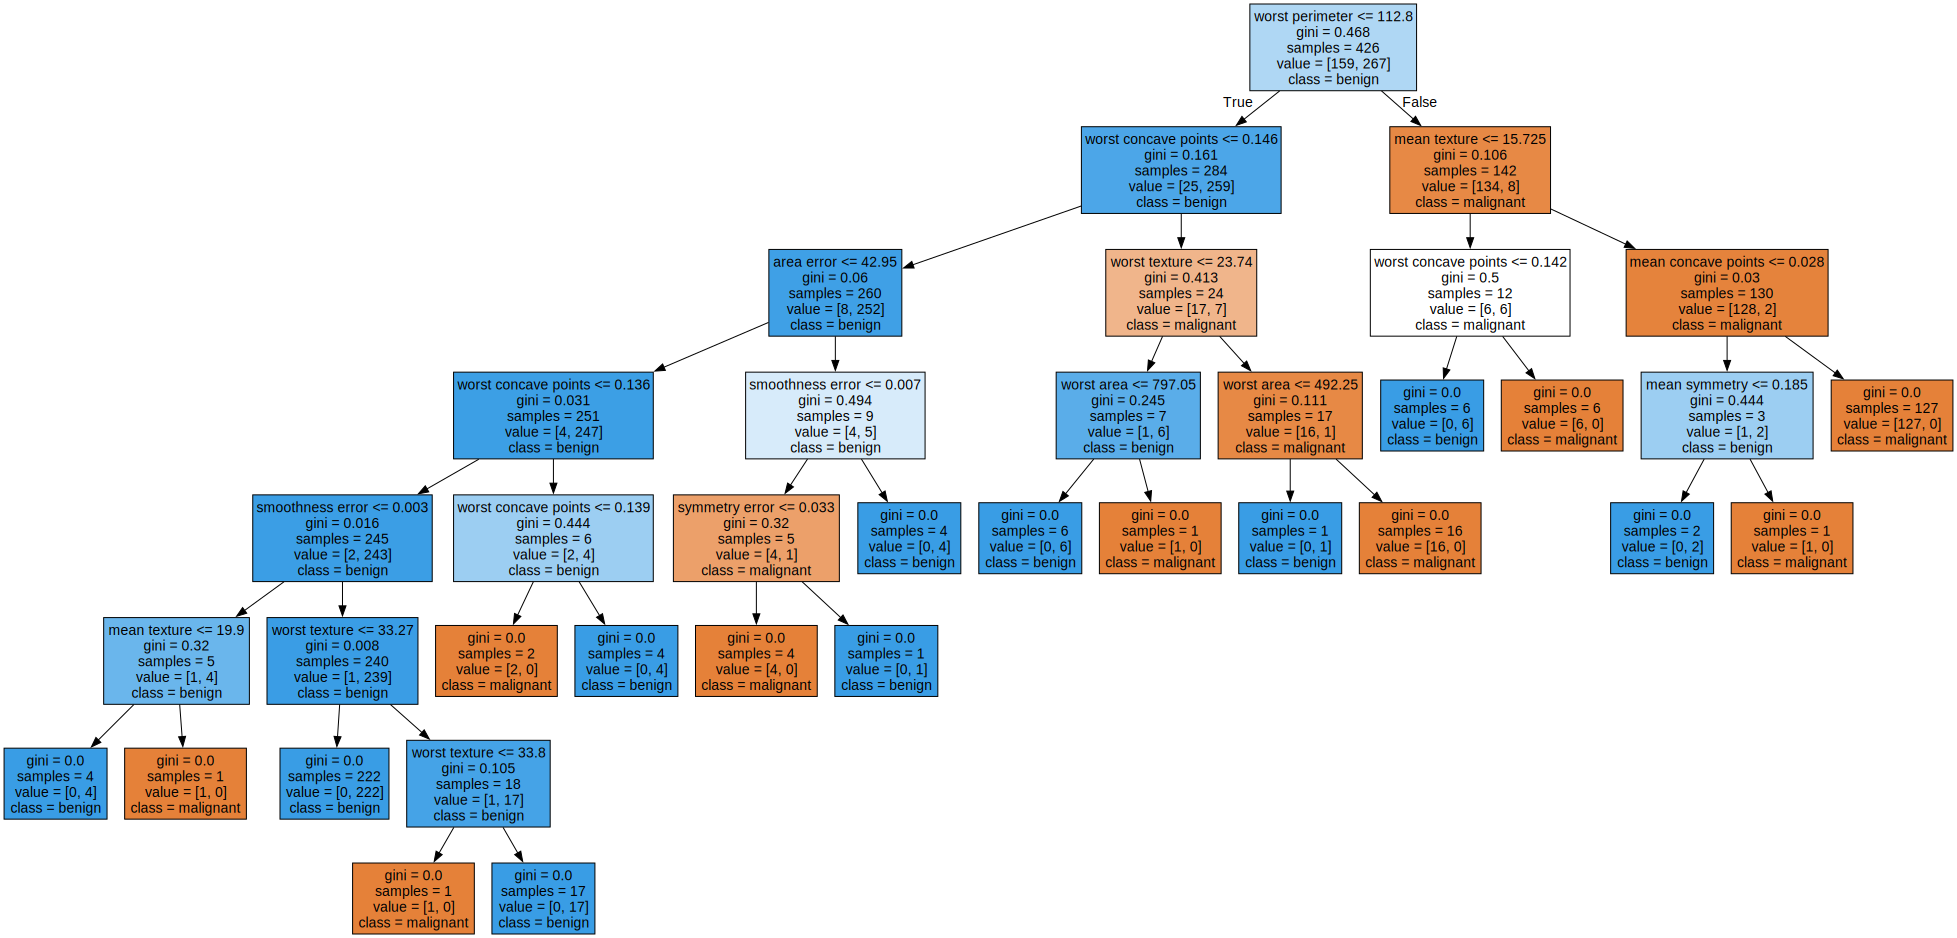

In [5]:
# 모델 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dtc, out_file="models/breast-cancer-model.dot",
                class_names=bc_dataset['target_names'],
                feature_names=bc_dataset['feature_names'],
                filled=True)

with open('models/breast-cancer-model.dot') as f:
    tree_graph_data = f.read()

graphviz.Source(tree_graph_data)

In [6]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=42)
# dtc2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
dtc2.fit(X_train, y_train)
dtc2.score(X_train, y_train), dtc2.score(X_test, y_test)

(0.9765258215962441, 0.9440559440559441)

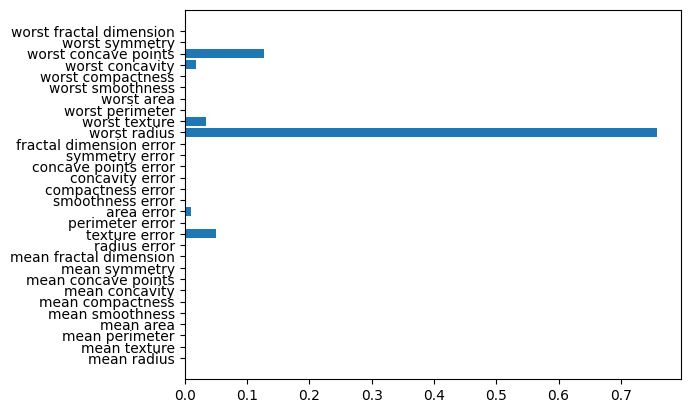

In [7]:
# for fn, fi in zip(bc_dataset['feature_names'], dtc2.feature_importances_):
#     print("{0} : {1}".format(fn, fi))

plt.barh(bc_dataset['feature_names'], dtc2.feature_importances_)
plt.show()

In [ ]:
# 데이터 준비 1
ram_price_df = pd.read_csv('data-files/ram_price.csv')
# ram_price_df = ram_price_df.drop(ram_price_df.columns[0], axis=1)
ram_price_df.drop(ram_price_df.columns[0], axis=1, inplace=True)
ram_price_df

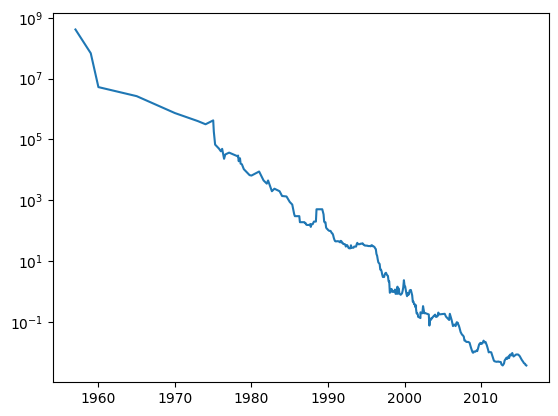

In [12]:
# plt.plot(ram_price_df['date'], ram_price_df['price'])
plt.semilogy(ram_price_df['date'], ram_price_df['price'])
plt.show()

In [22]:
# 데이터 준비 2
train_set = ram_price_df[ram_price_df['date'] < 2000]
test_set = ram_price_df[ram_price_df['date'] >= 2000]

X_train, y_train = train_set['date'].values, train_set['price'].values
X_test, y_test = test_set['date'].values, test_set['price'].values

print( X_train.shape, y_train.shape ) # X_train이 1차원 array인 것을 확인 -> 변경 필요

# reshape test
# X_train.reshape((-1, 1)).shape
# X_train.reshape((1, -1)).shape
# X_train.reshape((-1, 2)).shape

X_train, X_test = X_train.reshape((-1, 1)), X_test.reshape((-1, 1))
print( X_train.shape, X_test.shape ) # 2차원 배열로 변경된 것 확인

y_train2 = np.log(y_train)
y_test2 = np.log(y_test)


(202,) (202,)
(202, 1) (131, 1)


In [ ]:
# 트리 기반 회귀 모델 훈련(학습)

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
# dtr.fit(X_train, y_train)
dtr.fit(X_train, y_train2)

# dtr.score(X_train, y_train), dtr.score(X_test, y_test) # --> 문제 확인
dtr.score(X_train, y_train2), dtr.score(X_test, y_test2) # --> 문제 확인

(1.0, -5.229712351825342)

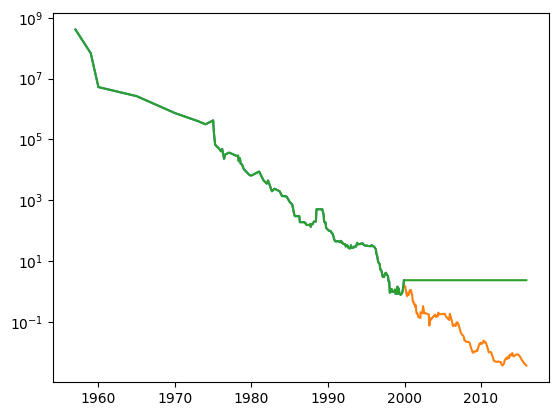

In [ ]:
# 문제 원인 확인
X = ram_price_df[['date']].values
y = ram_price_df['price'].values
y_predicted = dtr.predict(X)
y_predicted2 = np.exp(y_predicted)

plt.semilogy(train_set['date'], train_set['price'])
plt.semilogy(test_set['date'], test_set['price'])
# plt.semilogy(X, y_predicted)   # y_train으로 훈련한 모델
plt.semilogy(X, y_predicted2)    # y_train2로 훈련한 모델
plt.show()

In [ ]:
_